In [4]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('E:/portneuf/analysis/utils/'))
import trend_sen

In [5]:
grph_dir = os.path.join(os.path.join(os.getcwd(), 'graphics'))
os.makedirs(grph_dir, exist_ok=True)

In [6]:
df = pd.read_csv('openet_huc12_mean.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13386 entries, 0 to 13385
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         13386 non-null  object 
 1   huc12        13386 non-null  int64  
 2   ensb_mean    13386 non-null  float64
 3   sebal_mean   13386 non-null  float64
 4   sims_mean    13366 non-null  float64
 5   ptjpl_mean   13386 non-null  float64
 6   alexi_mean   12132 non-null  float64
 7   sseb_mean    13386 non-null  float64
 8   metric_mean  13386 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 941.3+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
df[['month', 'year', 'irr_year']] = df.apply(trend_sen.irr_year, axis=1, result_type='expand')

In [10]:
df

,Date,huc12,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean,month,year,irr_year
0,1999-10-01,170402080608,42.026444,28.041041,28.943985,39.911444,NaN,48.646364,49.580417,10,1999,1999
1,1999-10-01,170402080102,26.512871,18.490520,32.791097,33.195032,NaN,30.227945,23.308316,10,1999,1999
2,1999-10-01,170402080104,30.285855,20.160616,48.614720,38.381079,NaN,38.517728,22.781635,10,1999,1999
3,1999-10-01,170402080106,24.470616,13.929165,36.829052,34.803774,NaN,26.359794,20.717864,10,1999,1999
4,1999-10-01,170402080107,26.152002,12.648812,29.883294,34.669593,NaN,27.575865,27.614493,10,1999,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
13381,2023-12-01,170402080401,6.958857,6.613775,13.948754,8.504706,8.671903,6.975248,1.646916,12,2023,2024
13382,2023-12-01,170402080403,5.467448,4.827527,15.164764,5.874018,5.271535,7.039569,3.649094,12,2023,2024
13383,2023-12-01,170402080205,10.241848,9.108799,14.915002,16.996438,11.904131,8.117858,2.384249,12,2023,2024
13384,2023-12-01,170402080402,4.782044,1.460260,11.349560,5.358675,6.204585,6.384312,3.411171,12,2023,2024


In [11]:
df = df[(df['irr_year'] >= 2000) & (df['irr_year'] <= 2023)]

In [12]:
df.tail()

,Date,huc12,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean,month,year,irr_year
13289,2023-10-01,170402080401,36.279333,17.821051,54.189144,43.491394,34.415321,33.751811,40.820469,10,2023,2023
13290,2023-10-01,170402080403,35.491706,15.369492,62.243028,43.594079,33.811525,37.104112,36.387087,10,2023,2023
13291,2023-10-01,170402080205,38.320122,23.245931,50.384700,44.647535,34.516193,34.631707,45.891995,10,2023,2023
13292,2023-10-01,170402080402,37.404697,19.029515,56.132154,45.054196,40.683638,34.876683,40.558340,10,2023,2023
13293,2023-10-01,170402080404,33.993517,17.887052,63.201487,45.096001,33.684915,35.209625,35.600567,10,2023,2023


In [13]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [14]:
var_cols = ['ensb_mean', 'sebal_mean', 'sims_mean', 'ptjpl_mean',
       'alexi_mean', 'sseb_mean', 'metric_mean']
et_model_names = {
'ensb_mean': 'Ensemble Mean',
'sebal_mean': 'SEBAL',
'sims_mean': 'SIMS',
'ptjpl_mean': 'PT-JPL',
'alexi_mean': 'ALEXI',
'sseb_mean': 'SSEBop',
'metric_mean': 'METRIC'
}


In [15]:
df_irr_yr = df.groupby(['huc12', 'irr_year',])[var_cols].sum().reset_index() 
df_cs_yr = df_cs.groupby(['huc12', 'year',])[var_cols].sum().reset_index() 
df_non_cs_yr = df_non_cs.groupby(['huc12', 'year',])[var_cols].sum().reset_index()

In [16]:
df_irr_yr

,huc12,irr_year,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean
0,170402080101,2000,448.346849,489.490526,442.276617,522.299940,0.000000,401.436618,402.605681
1,170402080101,2001,415.788127,424.232121,382.379758,435.979678,495.812920,454.796334,333.982366
2,170402080101,2002,485.282813,525.341529,436.724728,555.518246,534.033936,417.903270,415.993276
3,170402080101,2003,479.404966,590.240229,388.202731,518.194162,550.613555,356.495890,362.993652
4,170402080101,2004,525.872409,617.857224,511.010629,555.865351,606.772722,441.666368,465.936850
...,...,...,...,...,...,...,...,...,...
1099,170402080608,2019,795.490801,812.930713,759.878021,851.551145,789.512759,783.024605,742.984448
1100,170402080608,2020,841.700934,874.837590,740.793201,794.467114,848.366672,830.242490,791.182778
1101,170402080608,2021,760.491332,842.479610,769.125113,736.162158,739.927132,765.199902,653.951839
1102,170402080608,2022,772.304480,852.020451,780.783048,745.182367,760.021543,785.872032,699.924098


In [17]:
df_cs[(df_cs['huc12'] == 170402080101) & (df_cs['year'] == 2000)].iloc[:,2:-3].sum() #to ensure we are grouping by cal year cs not irr year

ensb_mean      399.360062
sebal_mean     437.001760
sims_mean      388.792406
ptjpl_mean     455.936712
alexi_mean       0.000000
sseb_mean      357.344348
metric_mean    342.465236
dtype: float64

In [18]:
df_cs_yr

,huc12,year,ensb_mean,sebal_mean,sims_mean,ptjpl_mean,alexi_mean,sseb_mean,metric_mean
0,170402080101,2000,399.360062,437.001760,388.792406,455.936712,0.000000,357.344348,342.465236
1,170402080101,2001,382.659289,371.552793,339.372447,404.832102,439.107233,378.459726,318.861538
2,170402080101,2002,440.867276,469.832648,388.588996,486.563440,473.542131,376.145294,392.764701
3,170402080101,2003,408.317726,486.841290,328.650650,427.309366,449.935179,315.694999,311.744714
4,170402080101,2004,461.026796,507.243268,446.791097,483.221238,519.470184,376.318726,422.603827
...,...,...,...,...,...,...,...,...,...
1099,170402080608,2019,724.654295,731.318923,666.106534,748.875476,658.677267,715.147773,697.023454
1100,170402080608,2020,732.208345,718.997642,645.165533,665.827156,716.192237,753.796954,730.898052
1101,170402080608,2021,652.548121,705.519478,662.474702,609.843504,610.093850,678.931616,595.379125
1102,170402080608,2022,685.170003,749.295015,687.568046,645.401750,649.675703,697.596138,625.960724


In [40]:
# crop season trend analysis
trend_df_irr = trend_sen.analyze_trends(df_irr_yr, var_list = var_cols, sort_yr='irr_year') 

In [42]:
summary_df_irr = trend_sen.summarize_trends(trend_df_irr, var_cols)

In [43]:
summary_df_irr

,Variable,Increasing,Decreasing,No Trend
0,ensb_mean,29,0,17
1,sebal_mean,16,0,30
2,sims_mean,40,0,6
3,ptjpl_mean,10,0,36
4,alexi_mean,10,0,36
5,sseb_mean,45,0,1
6,metric_mean,30,0,16


In [44]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [45]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df_irr['huc12'] = trend_df_irr['huc12'].astype(str)

In [46]:
merged_gdf_cs = gdf.merge(trend_df_irr, left_on='huc12', right_on='huc12')

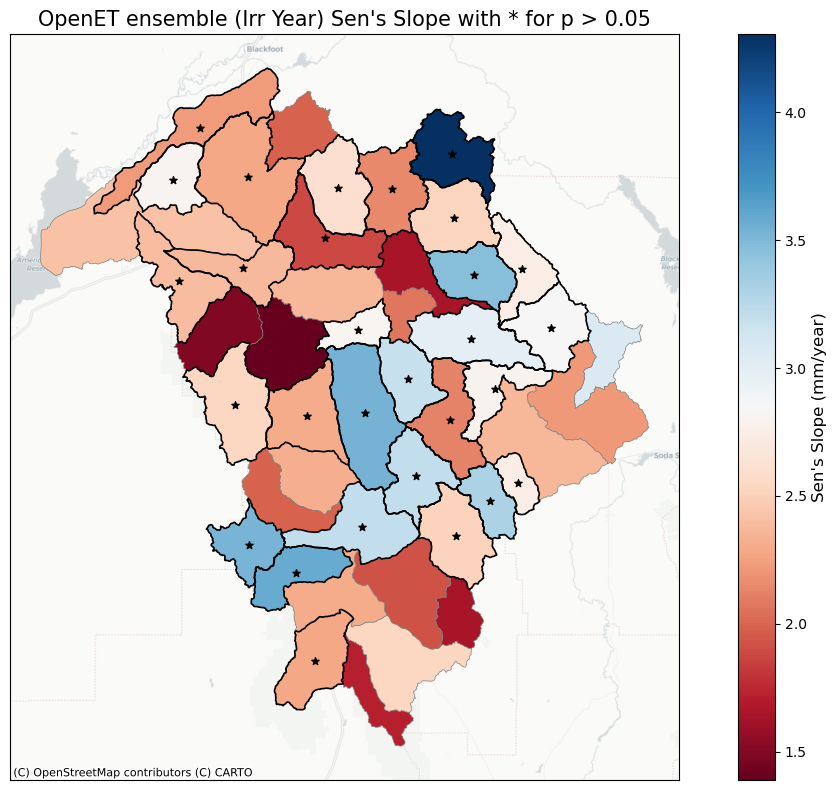

In [47]:
trend_sen.plot_trend_map(
    gdf=merged_gdf_cs,
    slope_col='ensb_mean_slope',
    pval_col='ensb_mean_p',
    title="OpenET ensemble (Irr Year) Sen's Slope with * for p > 0.05",
    cbar_label="Sen's Slope (mm/year)",
    cmap='RdBu',
    center_zero=True,
    show_significance_border=True,
    show_significance_marker=True,
    basemap=True,
    save_path=None,
)


In [26]:
from matplotlib.colors import LinearSegmentedColormap

# def get_custom_diverging_cmap():
#     return LinearSegmentedColormap.from_list(
#         'custom_diverging',
#         ['darkred', 'white', 'steelblue']
#     )

def get_custom_diverging_cmap():
    return LinearSegmentedColormap.from_list(
        'custom_diverging_extended',
        [
            '#67001f',  # deep red
            '#b2182b',  # mid red
            '#d6604d',  # light red
            '#f4a582',  # pale red
            '#f7f7f7',  # white / neutral
            '#92c5de',  # pale blue
            '#4393c3',  # light blue
            '#2166ac',  # mid blue
            '#053061'   # deep blue
        ],
        N=256
    )

cus_cmap = get_custom_diverging_cmap()

In [27]:
a = [f'{col}_slope' for col in var_cols]
merged_gdf_cs[[f'{col}_slope' for col in var_cols]].min().min()

-2.7601233427541936

Saved: graphics/ensb_mean_irr_year_trend_map.png


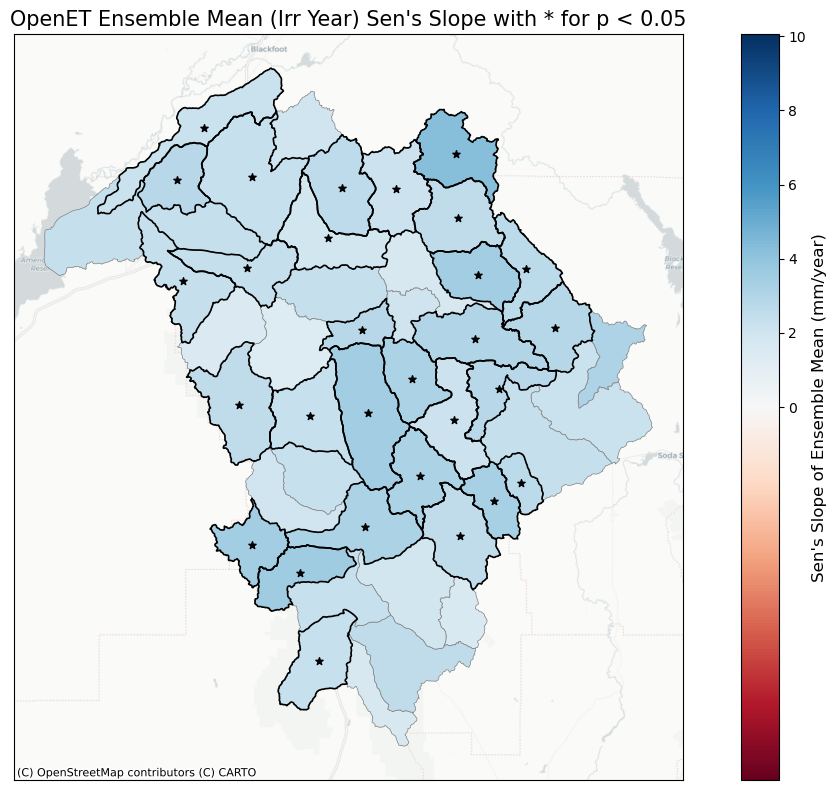

Saved: graphics/sebal_mean_irr_year_trend_map.png


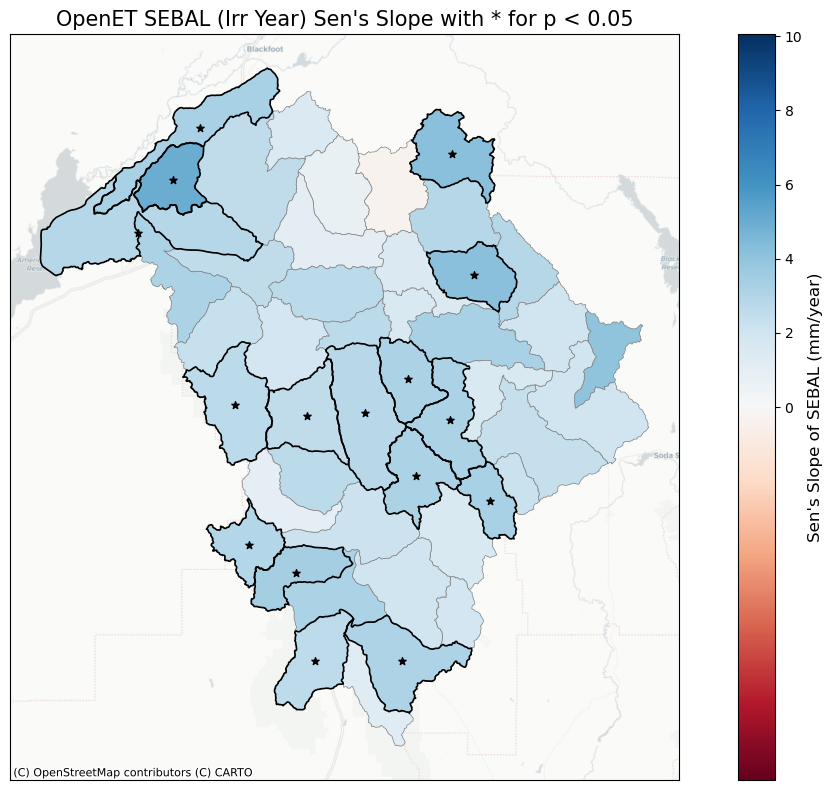

Saved: graphics/sims_mean_irr_year_trend_map.png


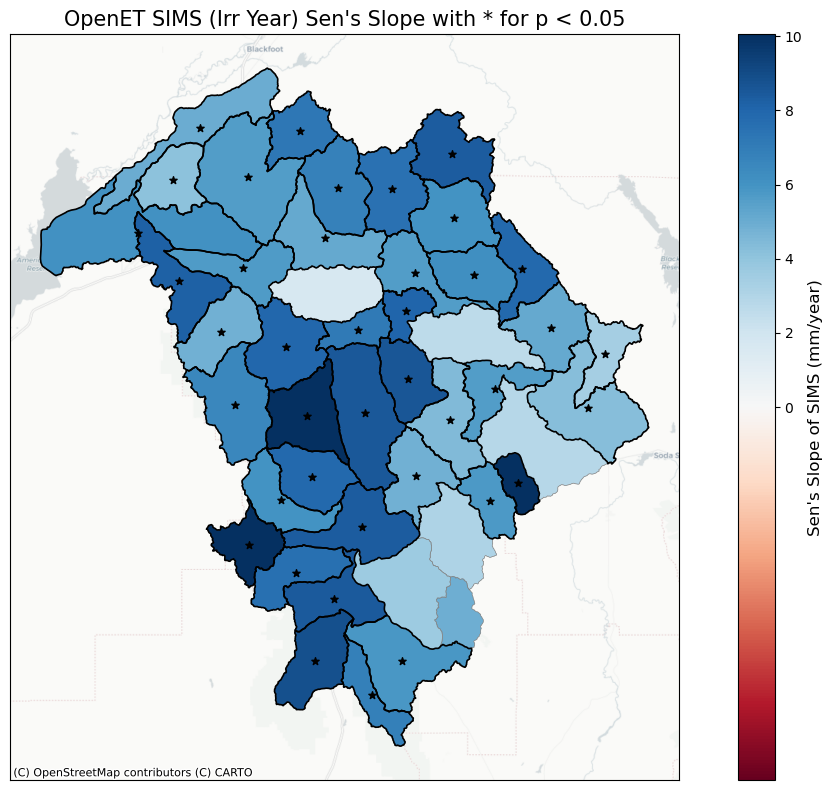

Saved: graphics/ptjpl_mean_irr_year_trend_map.png


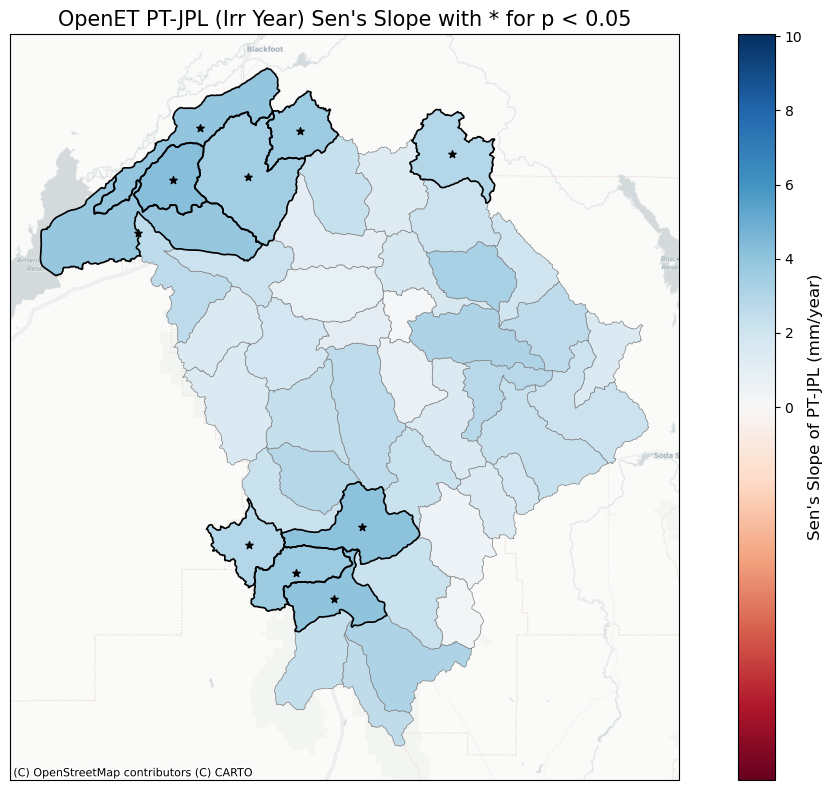

Saved: graphics/alexi_mean_irr_year_trend_map.png


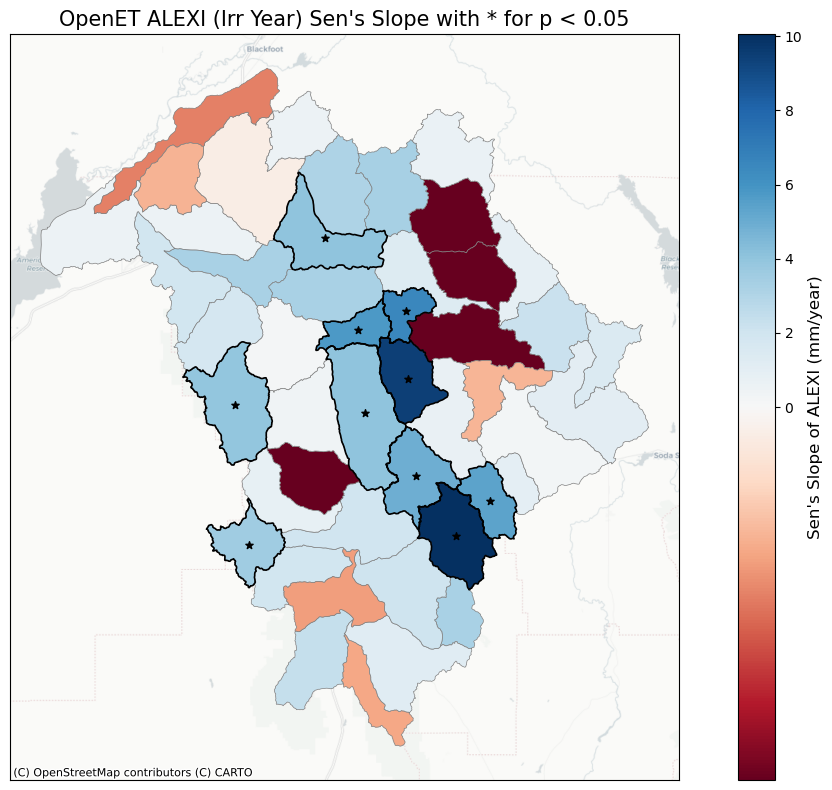

Saved: graphics/sseb_mean_irr_year_trend_map.png


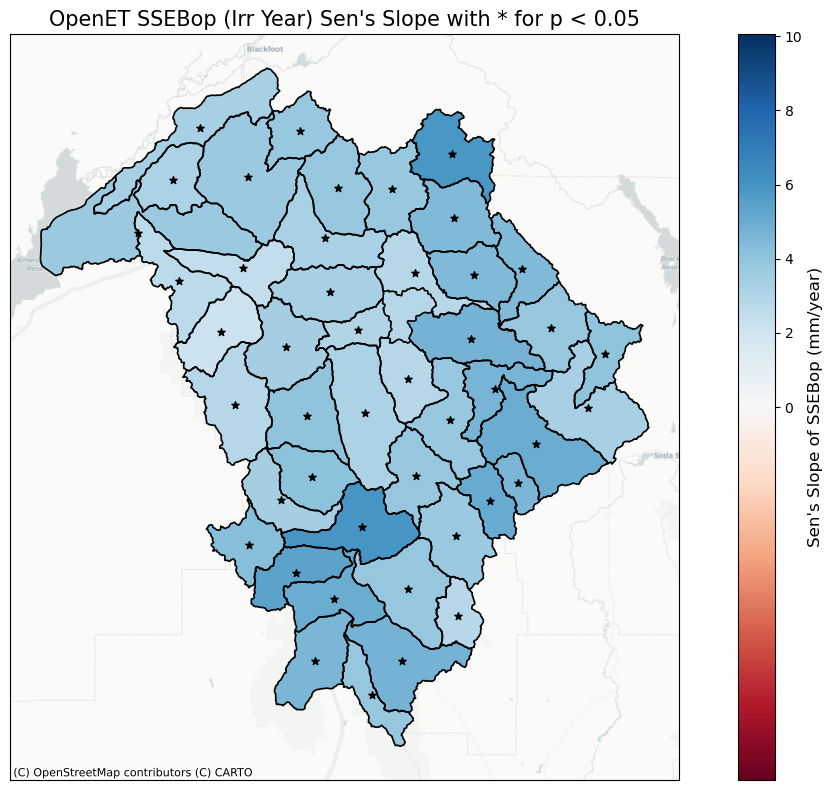

Saved: graphics/metric_mean_irr_year_trend_map.png


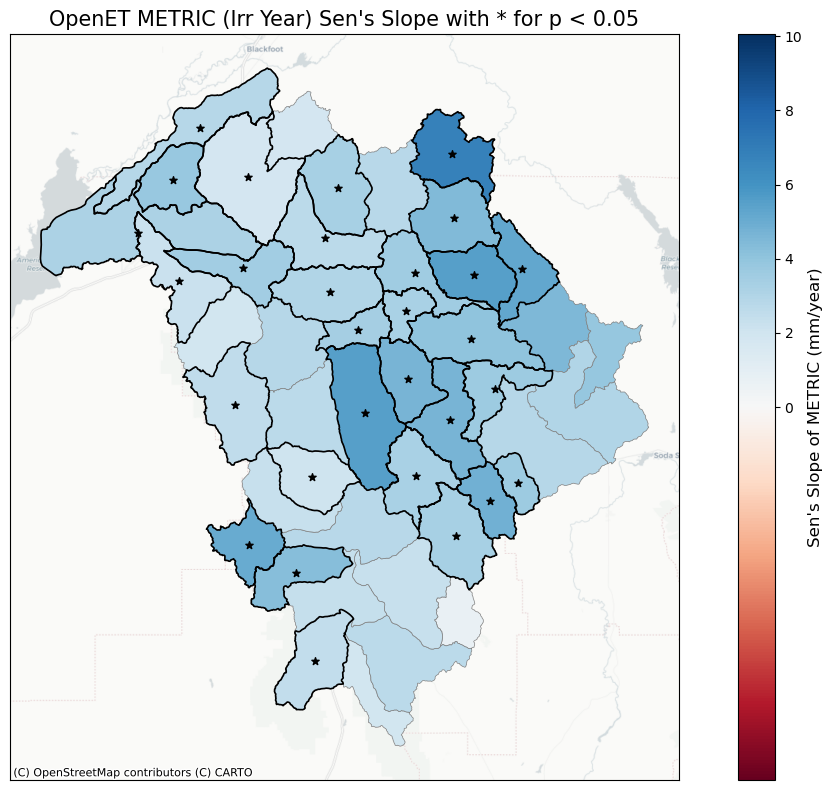

In [48]:
all_slopes = merged_gdf_cs[[f'{col}_slope' for col in var_cols]].values.flatten()
vmin, vmax = np.percentile(all_slopes[~np.isnan(all_slopes)], [1, 99])

for var in var_cols:
    trend_sen.plot_trend_map(
        gdf=merged_gdf_cs,
        slope_col=f'{var}_slope',
        pval_col=f'{var}_p',  # <-- FIXED
        title=f"OpenET {et_model_names.get(var, var)} (Irr Year) Sen's Slope with * for p < 0.05",
        cbar_label=f"Sen's Slope of {et_model_names.get(var, var)} (mm/year)",
        vmin=vmin,
        vmax=vmax,
        cmap= 'RdBu',
        center_zero=True,
        show_significance_border=True,
        show_significance_marker=True,
        basemap=True,
        save_path=f'graphics/{var}_irr_year_trend_map.png',
    )


In [29]:
trend_df_cs

,huc12,ensb_mean_slope,ensb_mean_p,ensb_mean_trend,sebal_mean_slope,sebal_mean_p,sebal_mean_trend,sims_mean_slope,sims_mean_p,sims_mean_trend,...,ptjpl_mean_trend,alexi_mean_slope,alexi_mean_p,alexi_mean_trend,sseb_mean_slope,sseb_mean_p,sseb_mean_trend,metric_mean_slope,metric_mean_p,metric_mean_trend
0,170402080101,4.587854,0.001157,increasing,4.553468,0.006858,increasing,8.554790,0.000266,increasing,...,increasing,0.769142,0.568338,no trend,5.779259,0.000004,increasing,7.228544,0.001375,increasing
1,170402080102,3.037283,0.003707,increasing,3.214924,0.027273,increasing,5.462466,0.001632,increasing,...,increasing,-2.473604,0.106900,no trend,4.195139,0.000053,increasing,4.803929,0.006858,increasing
2,170402080103,1.876284,0.016127,increasing,2.102952,0.143342,no trend,8.229617,0.000470,increasing,...,no trend,4.979037,0.018452,increasing,1.904996,0.050049,no trend,3.376465,0.039517,increasing
3,170402080104,1.786865,0.023996,increasing,1.997142,0.034999,increasing,5.030866,0.002688,increasing,...,increasing,0.459948,0.637438,no trend,2.630489,0.000565,increasing,3.845310,0.009202,increasing
4,170402080105,3.305909,0.003160,increasing,4.595728,0.001932,increasing,5.120567,0.002281,increasing,...,increasing,-1.922734,0.333358,no trend,3.960632,0.001375,increasing,5.560551,0.003707,increasing
5,170402080106,3.079679,0.009202,increasing,3.687782,0.014064,increasing,7.351131,0.000678,increasing,...,no trend,0.166207,0.980211,no trend,4.384846,0.000219,increasing,4.580517,0.012237,increasing
6,170402080107,3.266014,0.018452,increasing,2.338738,0.086988,no trend,4.550408,0.039517,increasing,...,no trend,1.208079,0.747106,no trend,3.858686,0.001632,increasing,3.633110,0.021065,increasing
7,170402080108,2.780050,0.014064,increasing,3.741016,0.027273,increasing,1.711597,0.286157,no trend,...,no trend,-2.397593,0.172491,no trend,3.787795,0.000390,increasing,3.873815,0.012237,increasing
8,170402080201,2.633984,0.034999,increasing,4.799074,0.056141,no trend,3.679437,0.012237,increasing,...,no trend,1.840036,0.286157,no trend,3.639193,0.004338,increasing,3.782083,0.106900,no trend
9,170402080202,2.973612,0.039517,increasing,2.909247,0.118128,no trend,3.935113,0.016127,increasing,...,no trend,0.914858,0.568338,no trend,3.374734,0.002281,increasing,2.832685,0.157406,no trend


In [30]:
trend_cs_gmet = pd.read_csv('../gridmet/trend_gmet.csv')

In [31]:
trend_cs_gmet

,huc12,pr_slope,pr_p,pr_trend,etr_slope,etr_p,etr_trend,tmmn_slope,tmmn_p,tmmn_trend,tmmx_slope,tmmx_p,tmmx_trend,tmean_slope,tmean_p,tmean_trend
0,170402080101,3.635731,0.096534,no trend,-4.228261,0.130262,no trend,0.035905,0.143342,no trend,-0.034437,0.309163,no trend,0.000526,1.000000,no trend
1,170402080102,3.557324,0.118128,no trend,-4.317625,0.106900,no trend,0.032970,0.188633,no trend,-0.033898,0.243693,no trend,-0.002059,0.901298,no trend
2,170402080103,5.244392,0.062839,no trend,-4.676828,0.070184,no trend,-0.000362,0.980211,no trend,-0.046962,0.157406,no trend,-0.021419,0.358743,no trend
3,170402080104,4.636374,0.086988,no trend,-4.718545,0.086988,no trend,0.007789,0.784970,no trend,-0.035778,0.224208,no trend,-0.015480,0.441931,no trend
4,170402080105,3.108619,0.172491,no trend,-5.449177,0.078219,no trend,0.028774,0.224208,no trend,-0.043746,0.205863,no trend,-0.011022,0.602442,no trend
5,170402080106,3.082043,0.143342,no trend,-5.014993,0.086988,no trend,0.033416,0.157406,no trend,-0.040002,0.224208,no trend,-0.003644,0.823349,no trend
6,170402080107,3.105719,0.143342,no trend,-5.795132,0.056141,no trend,0.030882,0.143342,no trend,-0.045719,0.205863,no trend,-0.009919,0.747106,no trend
7,170402080108,3.799053,0.106900,no trend,-5.969377,0.050049,no trend,0.017747,0.333358,no trend,-0.051613,0.118128,no trend,-0.024030,0.286157,no trend
8,170402080201,3.350337,0.086988,no trend,-4.832768,0.086988,no trend,0.022952,0.224208,no trend,-0.043007,0.143342,no trend,-0.004999,0.901298,no trend
9,170402080202,3.201986,0.130262,no trend,-6.493961,0.023996,decreasing,0.024234,0.286157,no trend,-0.058917,0.078219,no trend,-0.015614,0.503037,no trend


In [32]:
trend_cs_gmet['huc12'] = trend_cs_gmet['huc12'].astype(str)

In [33]:
trend_cs_gmet

,huc12,pr_slope,pr_p,pr_trend,etr_slope,etr_p,etr_trend,tmmn_slope,tmmn_p,tmmn_trend,tmmx_slope,tmmx_p,tmmx_trend,tmean_slope,tmean_p,tmean_trend
0,170402080101,3.635731,0.096534,no trend,-4.228261,0.130262,no trend,0.035905,0.143342,no trend,-0.034437,0.309163,no trend,0.000526,1.000000,no trend
1,170402080102,3.557324,0.118128,no trend,-4.317625,0.106900,no trend,0.032970,0.188633,no trend,-0.033898,0.243693,no trend,-0.002059,0.901298,no trend
2,170402080103,5.244392,0.062839,no trend,-4.676828,0.070184,no trend,-0.000362,0.980211,no trend,-0.046962,0.157406,no trend,-0.021419,0.358743,no trend
3,170402080104,4.636374,0.086988,no trend,-4.718545,0.086988,no trend,0.007789,0.784970,no trend,-0.035778,0.224208,no trend,-0.015480,0.441931,no trend
4,170402080105,3.108619,0.172491,no trend,-5.449177,0.078219,no trend,0.028774,0.224208,no trend,-0.043746,0.205863,no trend,-0.011022,0.602442,no trend
5,170402080106,3.082043,0.143342,no trend,-5.014993,0.086988,no trend,0.033416,0.157406,no trend,-0.040002,0.224208,no trend,-0.003644,0.823349,no trend
6,170402080107,3.105719,0.143342,no trend,-5.795132,0.056141,no trend,0.030882,0.143342,no trend,-0.045719,0.205863,no trend,-0.009919,0.747106,no trend
7,170402080108,3.799053,0.106900,no trend,-5.969377,0.050049,no trend,0.017747,0.333358,no trend,-0.051613,0.118128,no trend,-0.024030,0.286157,no trend
8,170402080201,3.350337,0.086988,no trend,-4.832768,0.086988,no trend,0.022952,0.224208,no trend,-0.043007,0.143342,no trend,-0.004999,0.901298,no trend
9,170402080202,3.201986,0.130262,no trend,-6.493961,0.023996,decreasing,0.024234,0.286157,no trend,-0.058917,0.078219,no trend,-0.015614,0.503037,no trend


In [34]:
df_mer_cs = trend_df_cs.merge(trend_cs_gmet, on='huc12')

In [35]:
df_mer_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   huc12              46 non-null     object 
 1   ensb_mean_slope    46 non-null     float64
 2   ensb_mean_p        46 non-null     float64
 3   ensb_mean_trend    46 non-null     object 
 4   sebal_mean_slope   46 non-null     float64
 5   sebal_mean_p       46 non-null     float64
 6   sebal_mean_trend   46 non-null     object 
 7   sims_mean_slope    46 non-null     float64
 8   sims_mean_p        46 non-null     float64
 9   sims_mean_trend    46 non-null     object 
 10  ptjpl_mean_slope   46 non-null     float64
 11  ptjpl_mean_p       46 non-null     float64
 12  ptjpl_mean_trend   46 non-null     object 
 13  alexi_mean_slope   46 non-null     float64
 14  alexi_mean_p       46 non-null     float64
 15  alexi_mean_trend   46 non-null     object 
 16  sseb_mean_slope    46 non-nu

In [36]:
df_mer_cs[['ensb_mean_slope', 'etr_slope']].corr()

,ensb_mean_slope,etr_slope
ensb_mean_slope,1.000000,-0.500478
etr_slope,-0.500478,1.000000


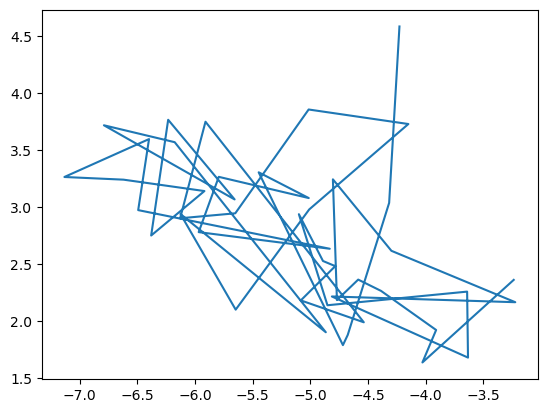

In [37]:
plt.plot(df_mer_cs['etr_slope'], df_mer_cs['ensb_mean_slope'])

In [38]:
df_mer_cs[['ensb_mean_slope', 'etr_slope']]

,ensb_mean_slope,etr_slope
0,4.587854,-4.228261
1,3.037283,-4.317625
2,1.876284,-4.676828
3,1.786865,-4.718545
4,3.305909,-5.449177
5,3.079679,-5.014993
6,3.266014,-5.795132
7,2.780050,-5.969377
8,2.633984,-4.832768
9,2.973612,-6.493961
